<a href="https://colab.research.google.com/github/Nutritiousfacts/DS-Unit-2-Kaggle-Challenge/blob/master/module1/Gabe_flomo_assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Try other [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```



In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,47520.000000,47520.000000,47520.000000,47520.000000,4.752000e+04,47520.000000,47520.000000,47520.000000,47520.000000,47520.000000
mean,37161.004693,324.205969,667.609070,34.079473,-5.708787e+00,0.468119,15.278325,5.640152,177.883923,1299.257786
std,21467.810552,3234.195130,693.304814,6.567411,2.944857e+00,11.587645,17.579189,9.649414,463.040185,952.090916
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18561.750000,0.000000,0.000000,33.092142,-8.544988e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37152.000000,0.000000,367.000000,34.912813,-5.023584e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55748.000000,20.000000,1320.000000,37.173188,-3.327151e+00,0.000000,17.000000,5.000000,210.000000,2004.000000
max,74246.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [0]:
import plotly.express as px



In [0]:
# split then clean data 
import pandas as pd
from sklearn.model_selection import train_test_split

train, val = train_test_split(train, train_size = .80, test_size = .20, stratify = train["status_group"])

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [0]:
px.scatter(train, y = "population", x = "latitude", color = "status_group",opacity = .5)

theres a lot of population sizes of zero so I will only consider populations at the mean value and up (probably not the best method but its what ill use for now). Also theres a lot of empty space between 10k - 30k so i will only consider populations less than 30k. 

In [0]:
import numpy as np

def wrangle(x):
  
  x = train.copy()

  pop_mean = x["population"].mean() 
  x = x.query("population >= @pop_mean and population < 30000 ")
  zeros = ["population","latitude"]
  for col in zeros:
    x[col] = x[col].replace(0,np.nan)

  #x = x.drop(columns = "quantity_group")
  return x

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [0]:
px.scatter(train, y = "population", x = "latitude", color = "status_group",opacity = .5)

In [0]:
# select features
target = "status_group"

train_feat = train.drop(columns = [target,"id"])
numeric = train_feat.select_dtypes(include = "number").columns.tolist()
cardinality = train_feat.select_dtypes(exclude = "number").nunique()
cat_feat = cardinality[cardinality <= 50].index.tolist()

features = numeric + cat_feat
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [0]:
# Matrix and target vector
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [0]:
# using a pipeline as shortcut

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(ce.OneHotEncoder(use_cat_names = True),
                    SimpleImputer(),
                    StandardScaler(),
                    LogisticRegression(multi_class = "auto", solver = "lbfgs", n_jobs = -1))

pipe.fit(X_train,y_train)
print("Validation Accuracy", pipe.score(X_val,y_val))

# prediction on test data
y_pred = pipe.predict(X_test)

Validation Accuracy 0.7138728323699421


In [0]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier 

pipe = make_pipeline(ce.OneHotEncoder(use_cat_names = True),
                    SimpleImputer(),
                    DecisionTreeClassifier(min_samples_leaf = 16))

pipe.fit(X_train,y_train)
print("Train Accuracy:",pipe.score(X_train,y_train))
print("Validation Accuracy:", pipe.score(X_val,y_val))
                      

Train Accuracy: 0.796938412246351
Validation Accuracy: 0.78121387283237


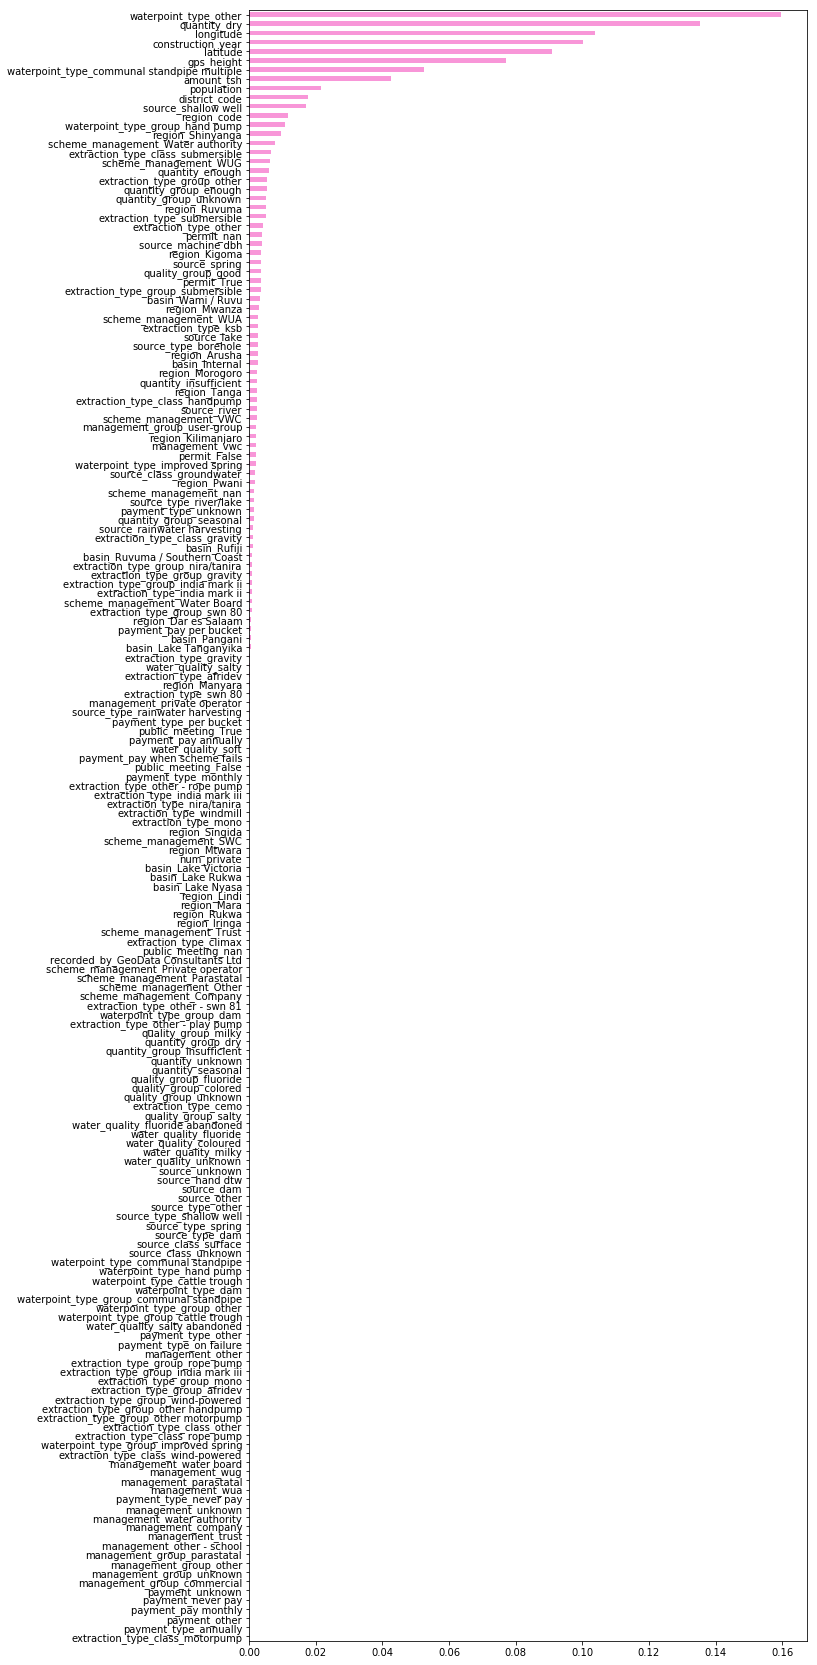

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

model = pipe.named_steps["decisiontreeclassifier"]
encoder = pipe.named_steps["onehotencoder"]
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize = (10,30))
importances.sort_values().plot.barh(color = "#F896D8");
